<a href="https://colab.research.google.com/github/alphthonio/My-NTU-MRes-Project/blob/Master/Notebook%2BDrugSamples%2BPCA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv("/content/Drug Molecules.csv")

In [3]:
data.head()

,S/N,DRUG MOLECULES,PSA VALUES,Fsp3,LogP,No. of Rotatable Bonds,nAromatic Rings,No. of Atoms minus H,Total Energies in Hartrees
0,1.0,ETHINYL ESTRADIOL,41.353,0.6,3.61,1,1,22,-64.621546
1,2.0,ACETYLCYSTEINE,62.585,0.6,-1.83,4,0,10,-36.443632
2,3.0,AMINOLEVULINIC ACID,77.215,0.6,-1.96,4,0,9,-32.736466
3,4.0,CILOSTAZOL,84.316,0.6,3.46,6,2,27,-82.239749
4,5.0,DORZOLAMIDE,112.271,0.6,0.61,3,1,19,-65.903040


In [4]:
data.drop(columns=['S/N'], inplace=True)

In [5]:
data.head()

,DRUG MOLECULES,PSA VALUES,Fsp3,LogP,No. of Rotatable Bonds,nAromatic Rings,No. of Atoms minus H,Total Energies in Hartrees
0,ETHINYL ESTRADIOL,41.353,0.6,3.61,1,1,22,-64.621546
1,ACETYLCYSTEINE,62.585,0.6,-1.83,4,0,10,-36.443632
2,AMINOLEVULINIC ACID,77.215,0.6,-1.96,4,0,9,-32.736466
3,CILOSTAZOL,84.316,0.6,3.46,6,2,27,-82.239749
4,DORZOLAMIDE,112.271,0.6,0.61,3,1,19,-65.903040


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DRUG MOLECULES              110 non-null    object 
 1   PSA VALUES                  110 non-null    float64
 2   Fsp3                        110 non-null    float64
 3   LogP                        110 non-null    float64
 4   No. of Rotatable Bonds      110 non-null    int64  
 5   nAromatic Rings             110 non-null    int64  
 6   No. of Atoms minus H        110 non-null    int64  
 7   Total Energies in Hartrees  110 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 7.0+ KB


Data Preprocessing and Exploratory Data Analysis

In [7]:
data["DRUG MOLECULES"].nunique()

110

In [8]:
# dropping DRUG MOLECULES
data1 = data.copy()
data = data.drop(['DRUG MOLECULES'], axis=1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PSA VALUES,110.0,64.988055,47.204897,4.670000,37.681500,61.557000,81.669750,374.3900
Fsp3,110.0,0.445000,0.224065,0.000000,0.290000,0.485000,0.600000,1.0000
LogP,110.0,2.100909,2.285100,-8.880000,0.792500,2.445000,3.632500,5.3500
No. of Rotatable Bonds,110.0,4.072727,3.233168,0.000000,1.000000,4.000000,6.000000,13.0000
nAromatic Rings,110.0,1.309091,0.955385,0.000000,1.000000,1.000000,2.000000,3.0000
No. of Atoms minus H,110.0,21.454545,5.178708,9.000000,22.000000,22.000000,22.000000,50.0000
Total Energies in Hartrees,110.0,-65.240609,21.390760,-164.787793,-69.295318,-66.278005,-62.497622,68.7775


Let's check the distribution and outliers for each column in the data

PSA VALUES
Skew : 3.14


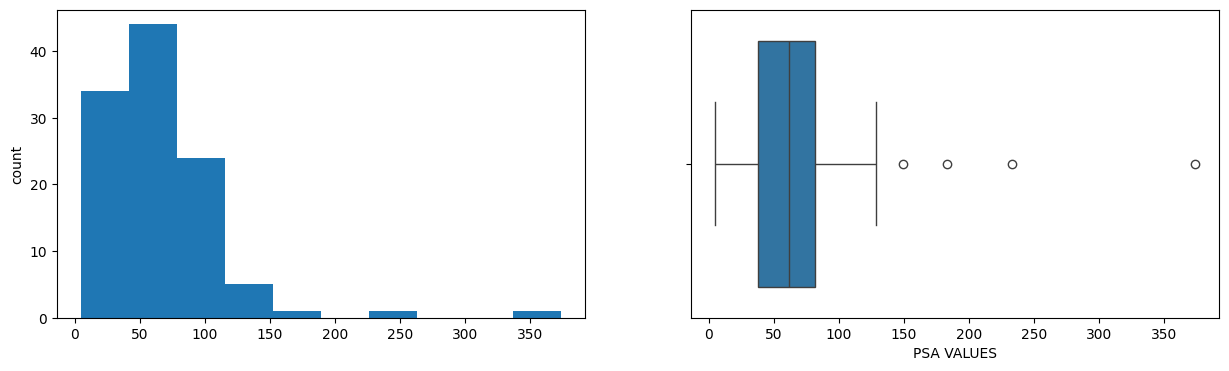

Fsp3
Skew : -0.14


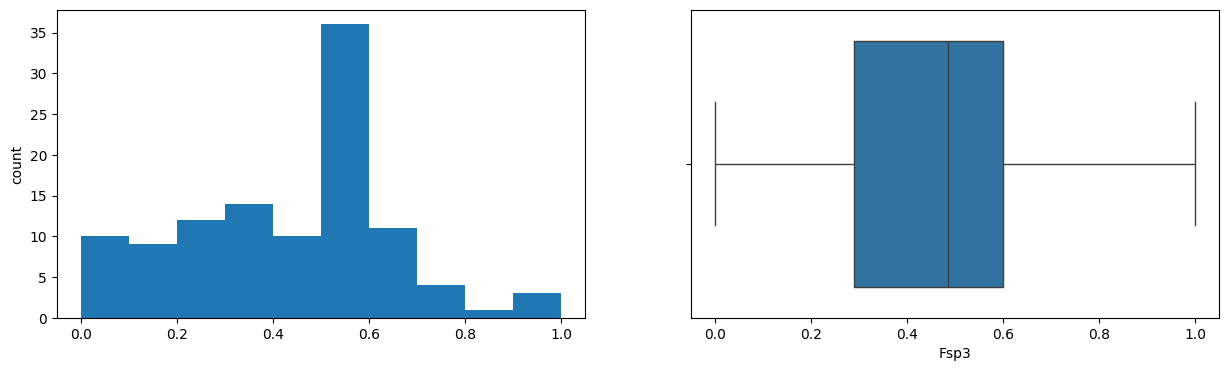

LogP 
Skew : -1.51


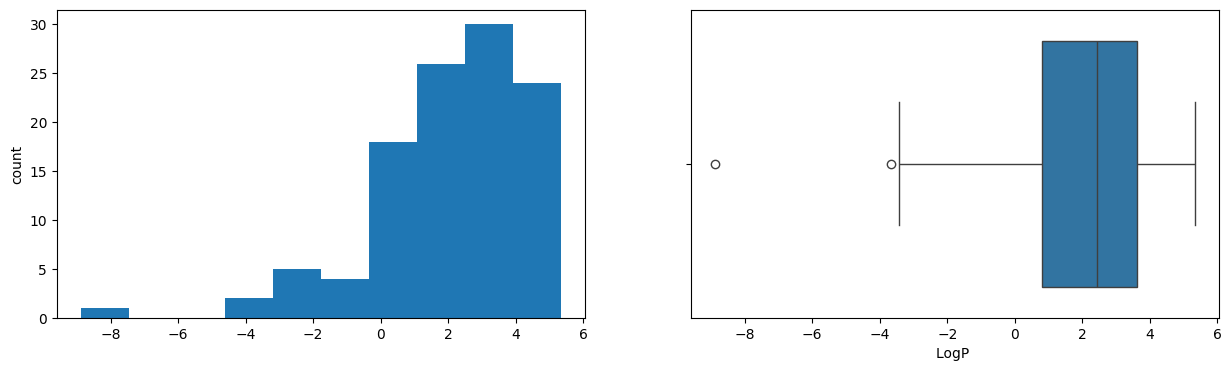

No. of Rotatable Bonds
Skew : 0.66


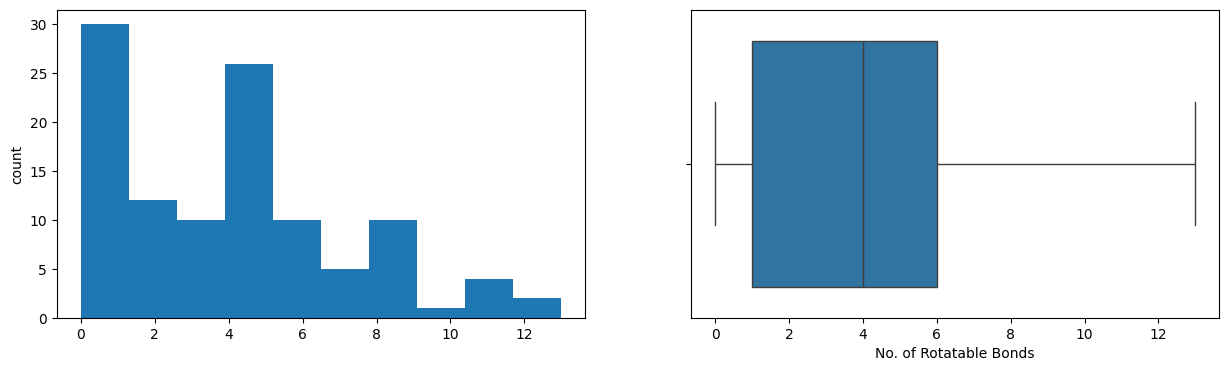

nAromatic Rings
Skew : 0.11


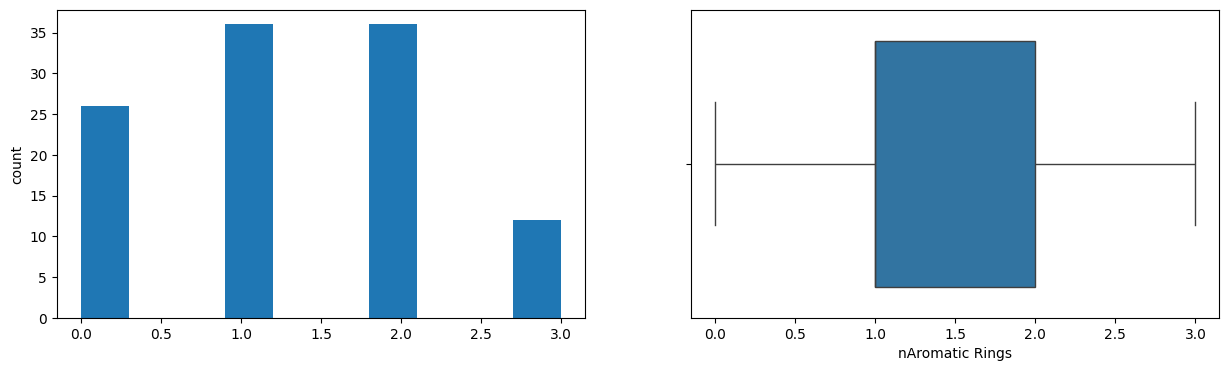

No. of Atoms minus H
Skew : 2.11


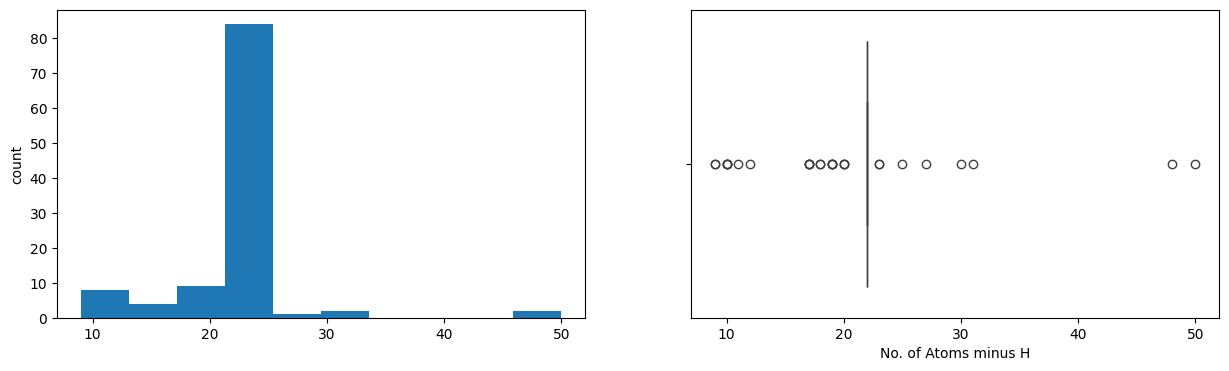

Total Energies in Hartrees
Skew : 0.61


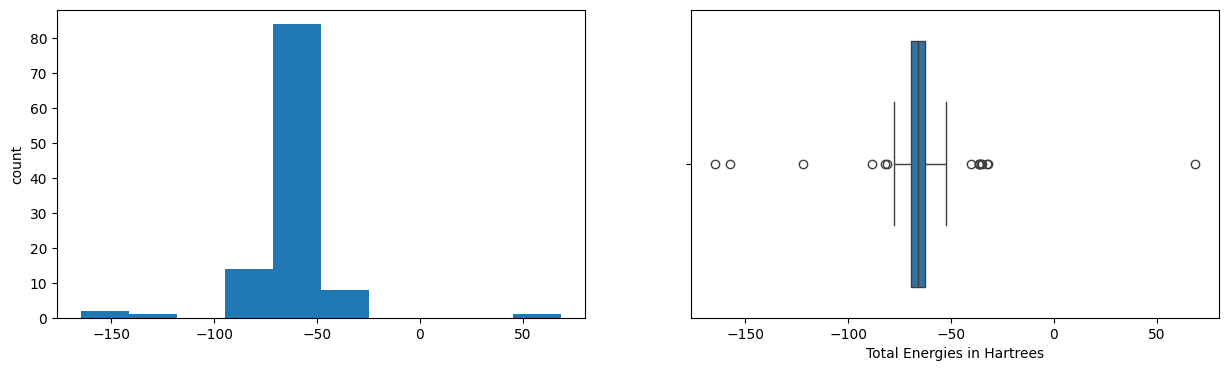

In [10]:
for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

Checking correlation

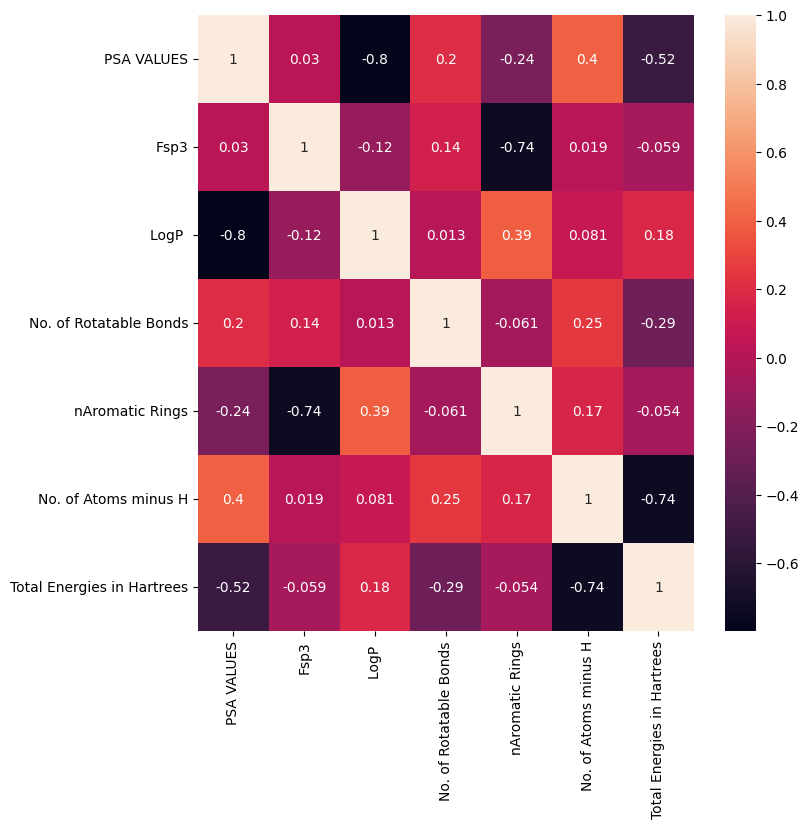

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
data_scaled.head()

,PSA VALUES,Fsp3,LogP,No. of Rotatable Bonds,nAromatic Rings,No. of Atoms minus H,Total Energies in Hartrees
0,-0.502982,0.69493,0.663427,-0.954726,-0.325006,0.105808,0.029073
1,-0.051140,0.69493,-1.728108,-0.022597,-1.376494,-2.221977,1.352396
2,0.260204,0.69493,-1.785259,-0.022597,-1.376494,-2.415959,1.526496
3,0.411322,0.69493,0.597484,0.598822,0.726483,1.075719,-0.798333
4,1.006238,0.69493,-0.655434,-0.333307,-0.325006,-0.476138,-0.031110


Principal Component Analysis

In [14]:
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

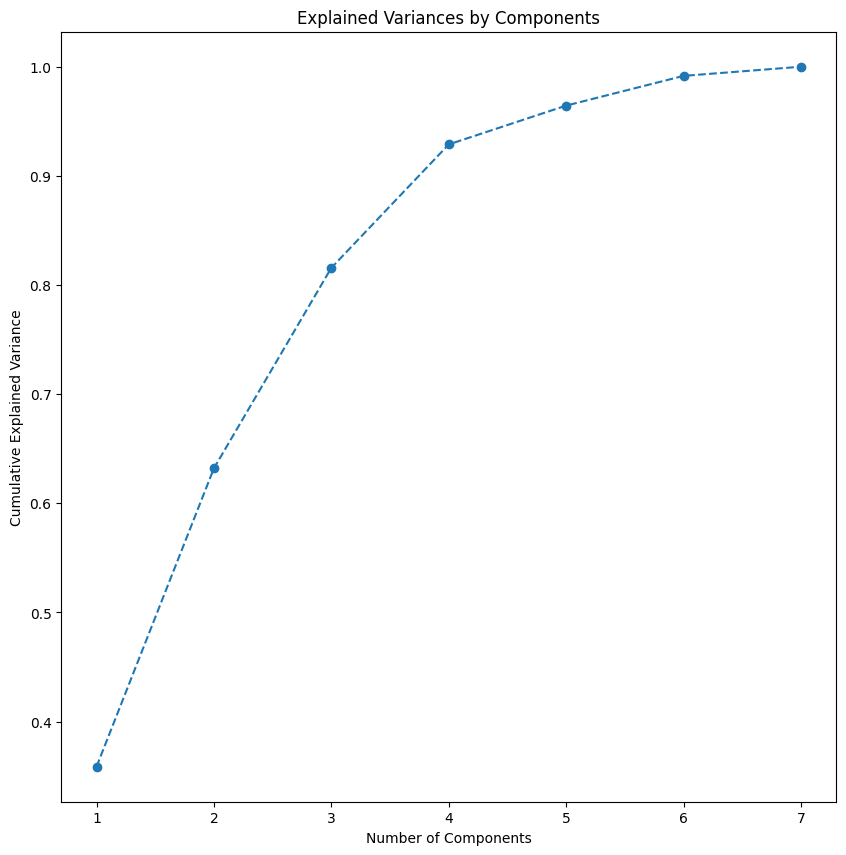

In [15]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [16]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  4


Observations:

out of the 7 original features, we reduced the number of features through principal components to 4, these components explain more than 90% of the original variance.
So that is about 43% reduction in the dimensionality with a loss of 10% in variance.
Let us now look at these principal components as a linear combination of original features.

In [17]:
# @title Default title text
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
PSA VALUES,0.55,0.00,-0.37,0.08
Fsp3,0.21,-0.47,0.52,-0.24
LogP,-0.41,0.29,0.54,-0.13
No. of Rotatable Bonds,0.25,0.13,0.42,0.86
nAromatic Rings,-0.25,0.60,-0.21,0.09
No. of Atoms minus H,0.37,0.45,0.25,-0.34
Total Energies in Hartrees,-0.47,-0.35,-0.13,0.24


Observations:

Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:
0.55 * PSA Values + 0.21 * Fsp3 - 0.41 * LogP + 0.25 * No. of Rotatable Bonds - 0.25 * nAromatic Rings + 0.37 * No. of Atoms minus H - 0.47 * Total Energies in Hatrees.

* The first principal component, PC1, is a measure PSA Values.
* The second principal component, PC2, is a measure of nAromatic Rings.
* The third principal component, PC3, is a measure of Fsp3 and LogP.
* The fourth principal component, PC4, is a measure of No. of Rotatable Bonds.

We can also visualize the data in 2 dimensions using first two principal components

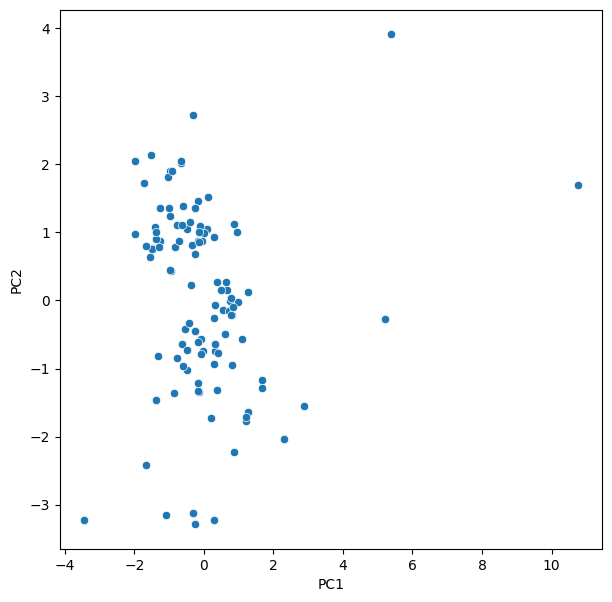

In [18]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Creating scatter plot for first two principal components with hue= 'cylinders'

Text(0, 0.5, 'PC2')

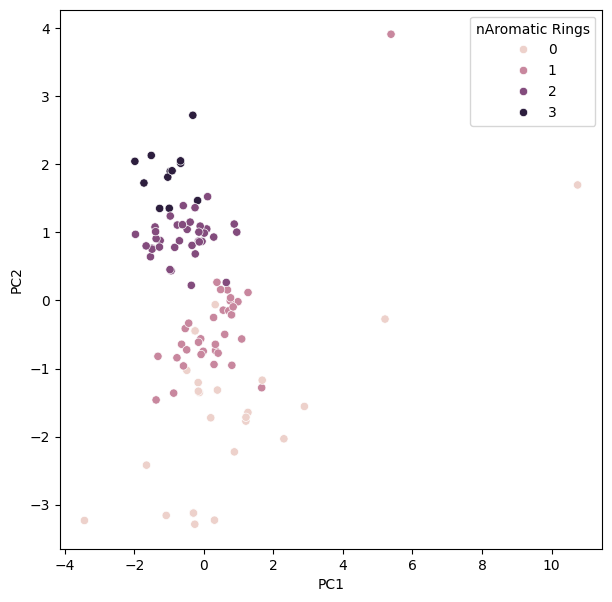

In [19]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='nAromatic Rings')
plt.xlabel("PC1")
plt.ylabel("PC2")

Observations:

We can see there are 4 groups:
One with zero number of Aromatic rings
One with 1 number of Aromatic rings
One with 2 number of Aromatic rings and
one with 3 number of Aromatic rings
However, the distinction between the groups is not strong and there are some overlaps.

In [20]:
#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

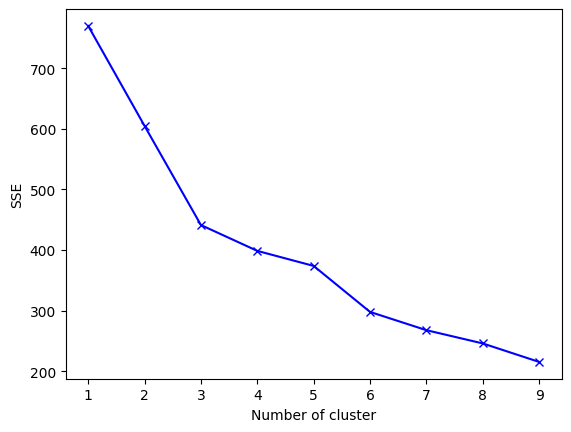

In [21]:
#Empty dictionary to store the SSE for each value of k
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Observations:

We can see from the plot that there doesn't seem to be a clear 'elbow' here. We may chose either of 3 or 4 as our # of clusters.
So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

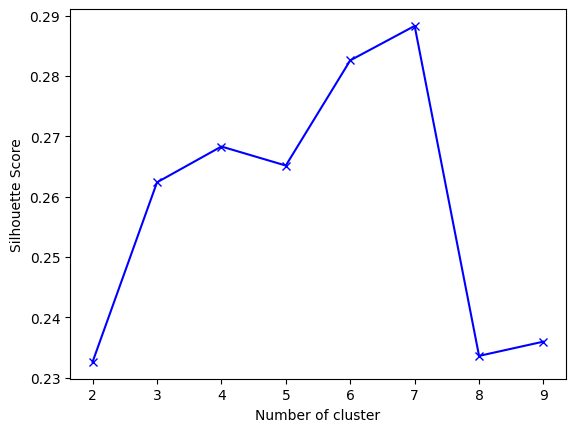

In [22]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()



So let's take the number of clusters as 3.

In [23]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)


KMeans(n_clusters=3, random_state=1)

In [24]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

In [25]:
#Adding predicted labels to the original data and scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [26]:
data['KMeans_Labels'].value_counts()

,count
KMeans_Labels,
0,60
1,47
2,3


In [27]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
PSA VALUES,65.268900,52.681936,252.167000,61.154000,58.896000,233.11800
Fsp3,0.584667,0.256809,0.600000,0.600000,0.270000,0.60000
LogP,1.577833,3.088085,-2.903333,1.610000,3.060000,-3.66000
No. of Rotatable Bonds,4.300000,3.574468,7.333333,4.000000,4.000000,9.00000
nAromatic Rings,0.616667,2.255319,0.333333,1.000000,2.000000,0.00000
No. of Atoms minus H,19.716667,22.319149,42.666667,22.000000,22.000000,48.00000
Total Energies in Hartrees,-60.926602,-65.455177,-148.159182,-66.758441,-65.021389,-157.60179


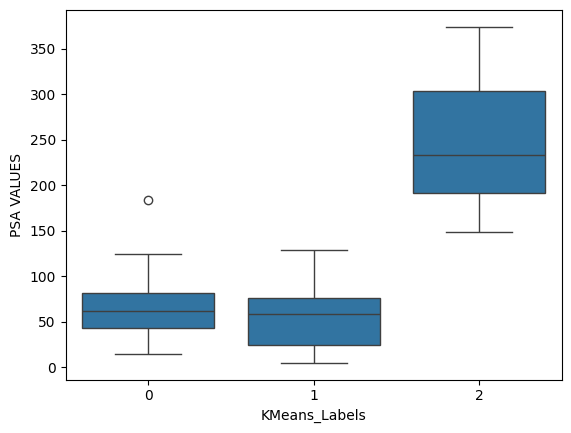

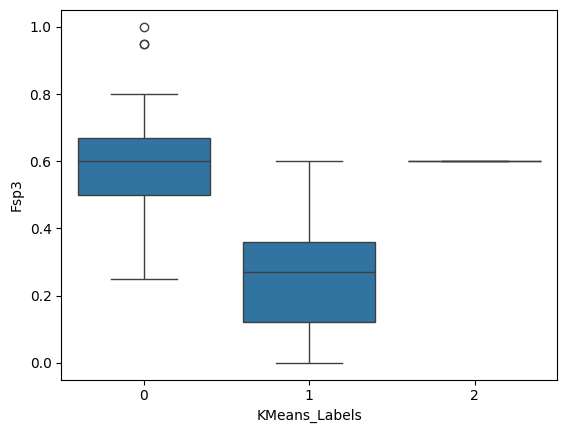

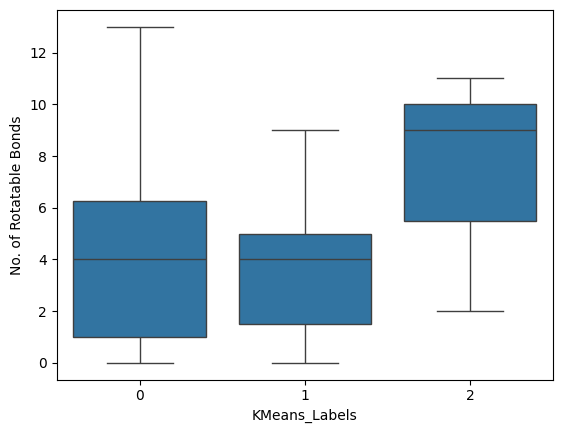

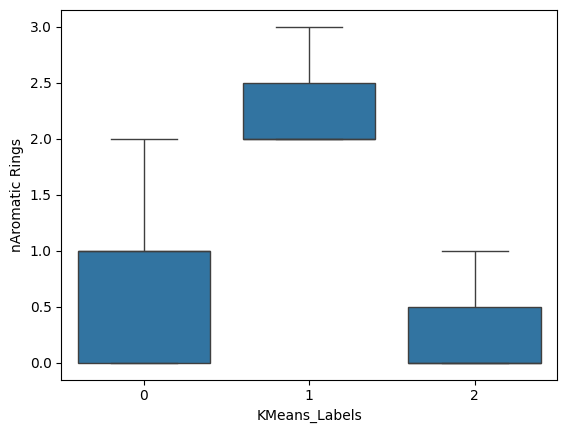

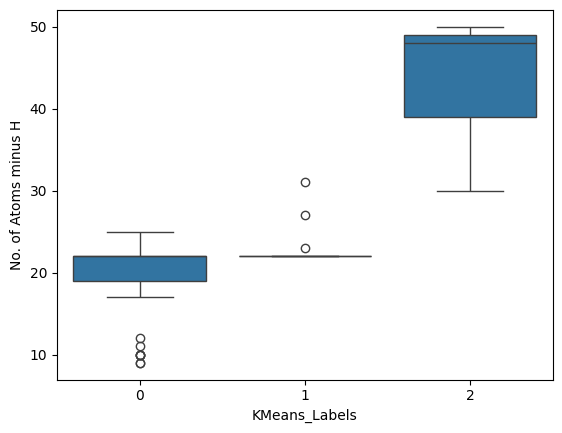

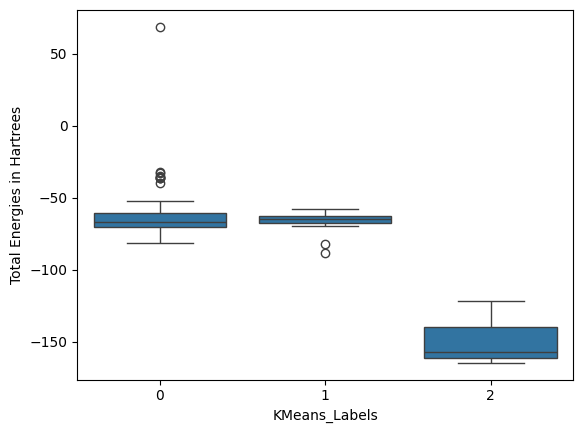

In [28]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds', 'nAromatic Rings', 'No. of Atoms minus H', 'Total Energies in Hartrees']

for col in cols_visualise:
    sns.boxplot(x ='KMeans_Labels', y = col, data = data)
    plt.show()

In [29]:
data.head()

,PSA VALUES,Fsp3,LogP,No. of Rotatable Bonds,nAromatic Rings,No. of Atoms minus H,Total Energies in Hartrees,KMeans_Labels
0,41.353,0.6,3.61,1,1,22,-64.621546,0
1,62.585,0.6,-1.83,4,0,10,-36.443632,0
2,77.215,0.6,-1.96,4,0,9,-32.736466,0
3,84.316,0.6,3.46,6,2,27,-82.239749,1
4,112.271,0.6,0.61,3,1,19,-65.903040,0


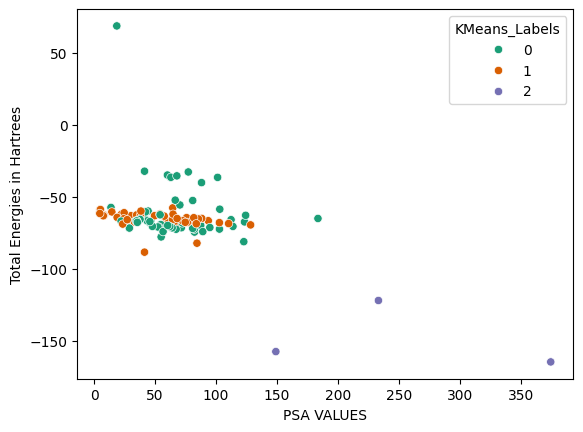

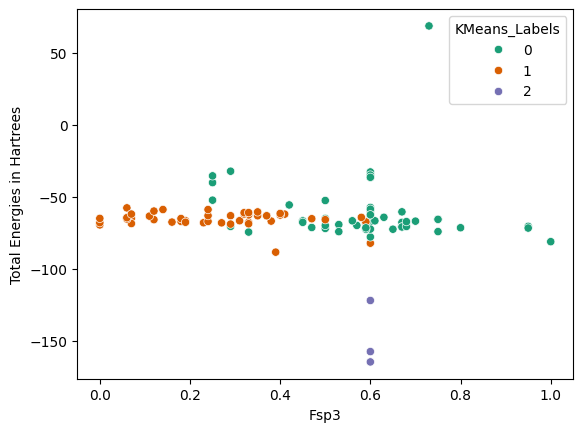

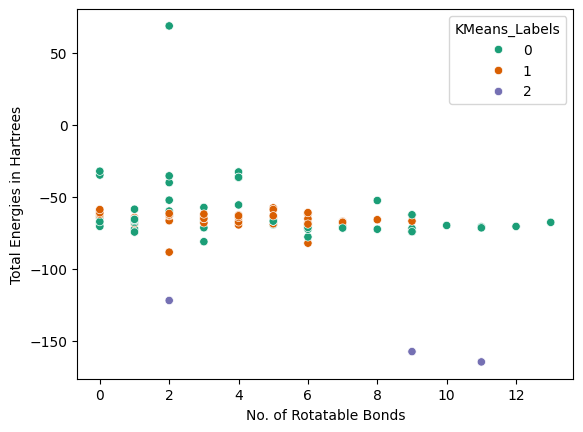

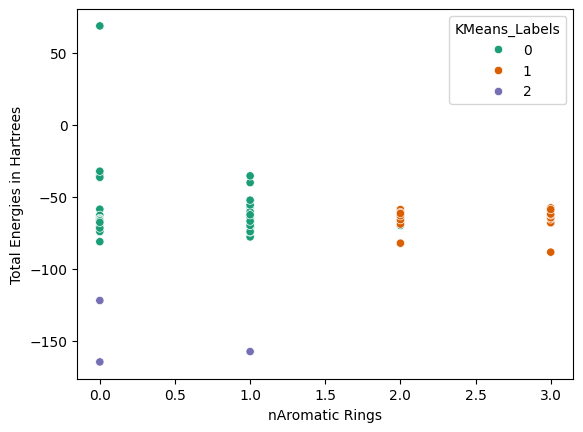

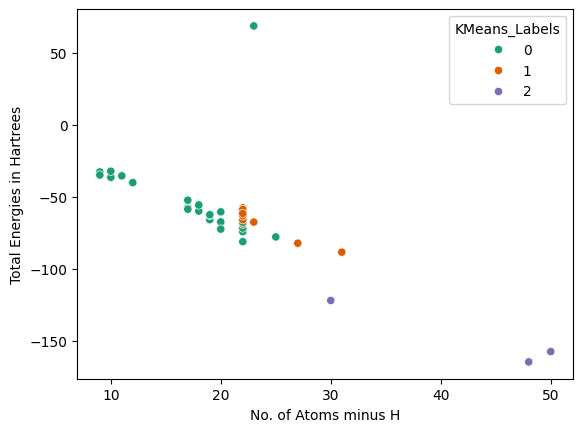

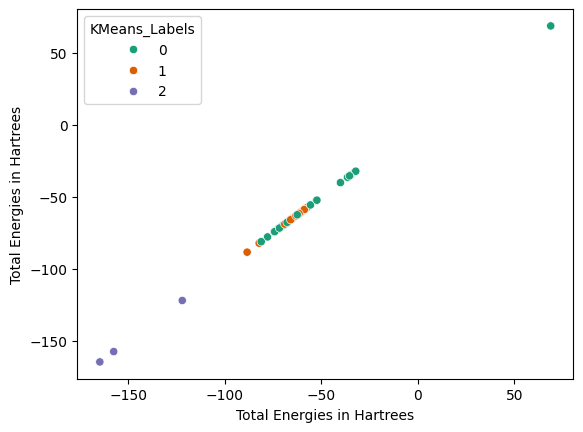

In [30]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds', 'nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']
for col in cols_visualise:
    sns.scatterplot(x = col, y = 'Total Energies in Hartrees',data = data ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

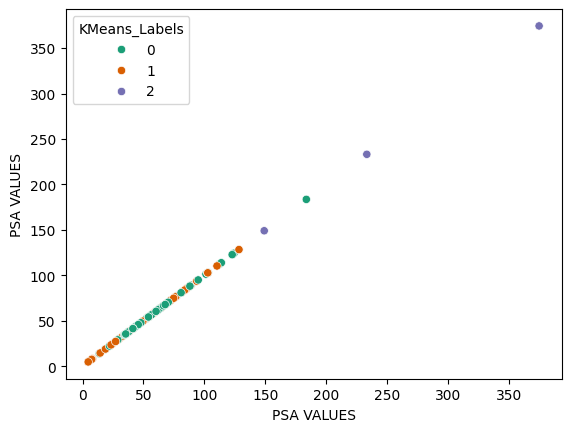

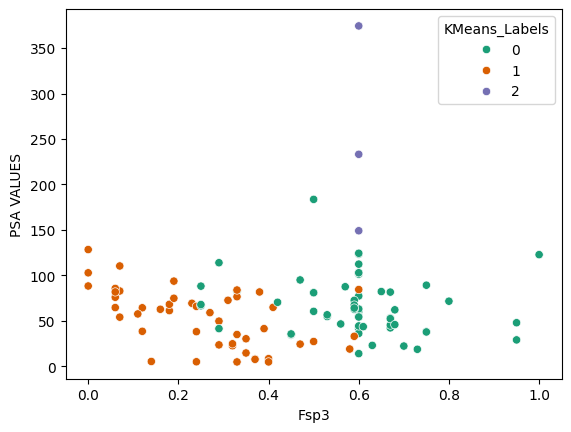

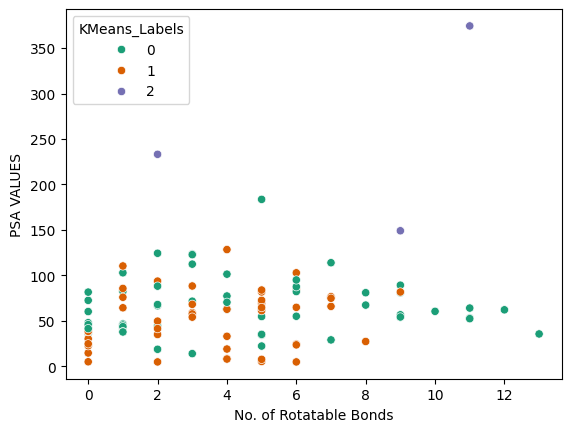

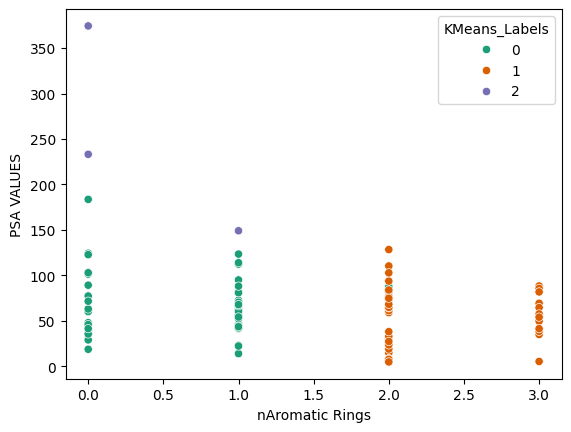

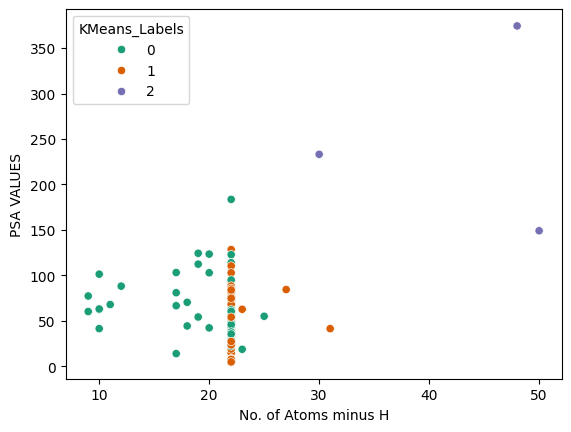

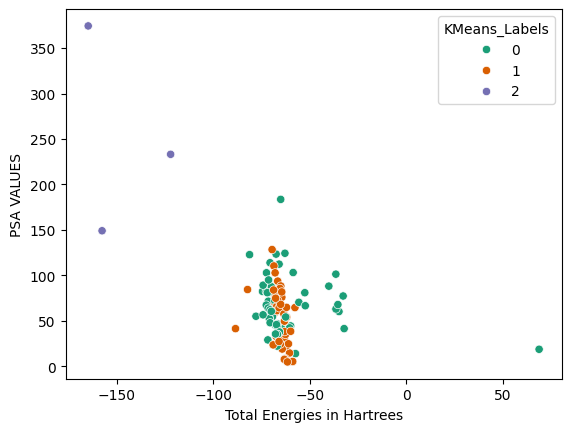

In [31]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds', 'nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']
for col in cols_visualise:
    sns.scatterplot(x = col, y = 'PSA VALUES',data = data ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

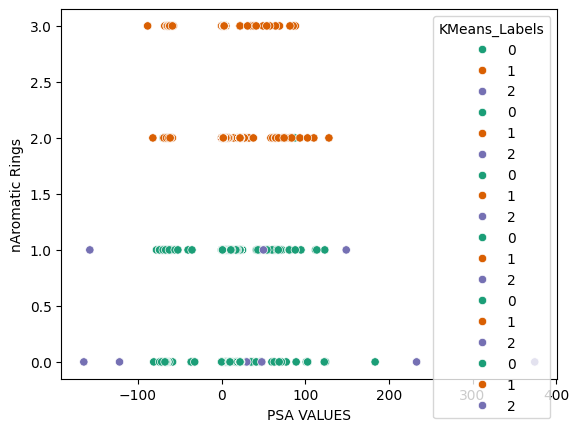

In [32]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds', 'nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']
for col in cols_visualise:
    sns.scatterplot(x = col, y = 'nAromatic Rings',data = data ,hue='KMeans_Labels', palette='Dark2')

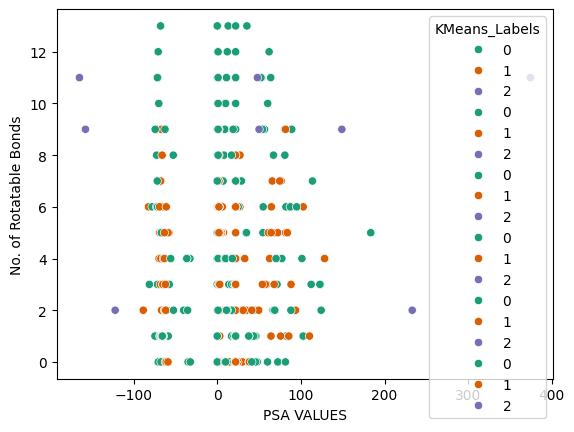

In [33]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds', 'nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']
for col in cols_visualise:
    sns.scatterplot(x = col, y = 'No. of Rotatable Bonds',data = data ,hue='KMeans_Labels', palette='Dark2')

Let's try another algorithm

K-Medoids Clustering

In [34]:
#Install this to package to use KMedoids
! pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.3 MB/s eta 0:00:00


In [35]:
from sklearn_extra.cluster import KMedoids

In [36]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [37]:
data.kmedoLabels.value_counts()

,count
kmedoLabels,
0,55
1,35
2,20


In [38]:
#Calculating mean and median of the original data for each label
original_features = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds','nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']

mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
PSA VALUES,78.181345,64.621714,29.347600,62.626000,66.496000,22.784000
Fsp3,0.602727,0.188571,0.460000,0.600000,0.190000,0.430000
No. of Rotatable Bonds,4.381818,2.771429,5.500000,4.000000,2.000000,5.000000
nAromatic Rings,0.581818,2.200000,1.750000,1.000000,2.000000,2.000000
No. of Atoms minus H,21.181818,21.285714,22.500000,22.000000,22.000000,22.000000
Total Energies in Hartrees,-68.706748,-62.922250,-59.765856,-67.455294,-64.904736,-64.773115


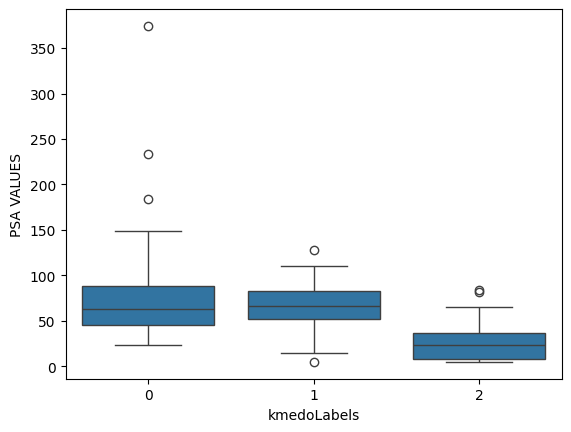

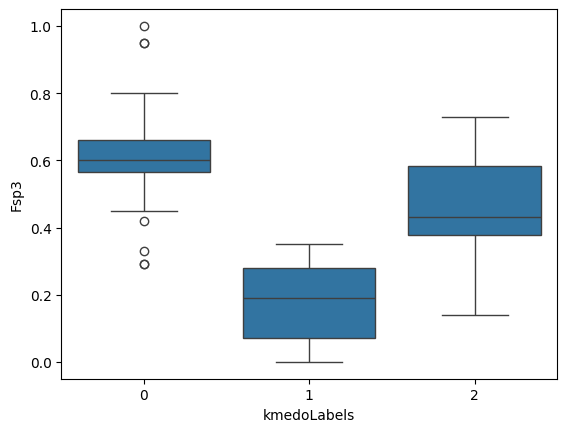

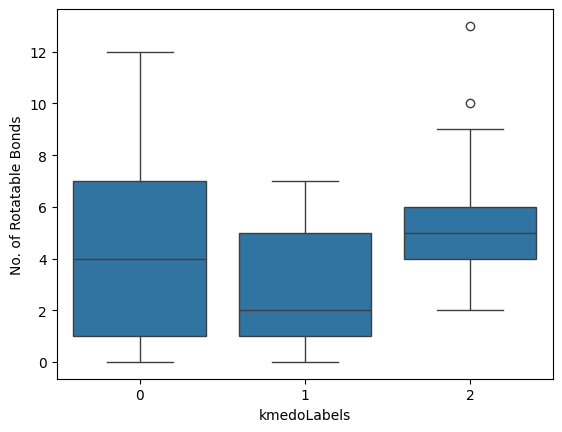

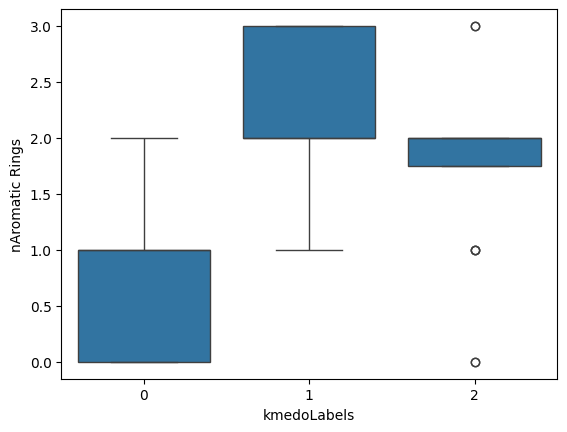

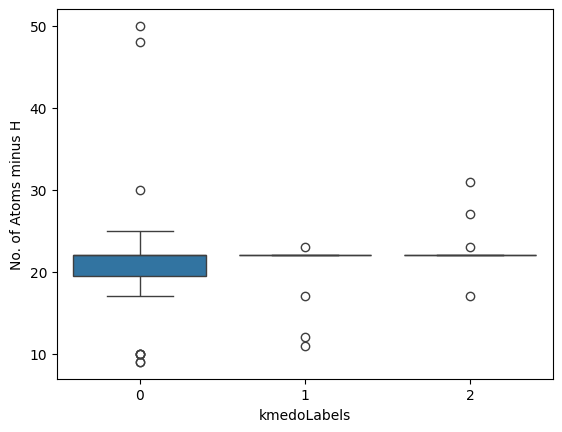

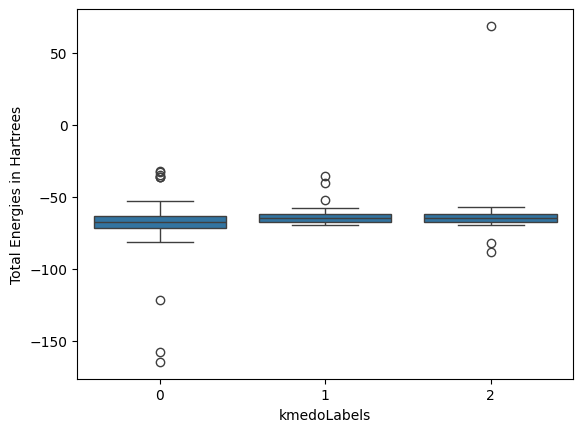

In [39]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    plt.show()

Gaussian Mixture Clustering

In [40]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [41]:
data.GmmLabels.value_counts()

,count
GmmLabels,
1,80
0,27
2,3


In [42]:
#Calculating mean and median of the original data for each label
original_features = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds','nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
PSA VALUES,74.007148,54.924900,252.167000,66.496000,55.580500,233.11800
Fsp3,0.518889,0.414250,0.600000,0.600000,0.400000,0.60000
No. of Rotatable Bonds,3.407407,4.175000,7.333333,3.000000,4.000000,9.00000
nAromatic Rings,0.740741,1.537500,0.333333,1.000000,2.000000,0.00000
No. of Atoms minus H,17.481481,22.000000,42.666667,18.000000,22.000000,48.00000
Total Energies in Hartrees,-51.408067,-66.799645,-148.159182,-58.628932,-66.758441,-157.60179


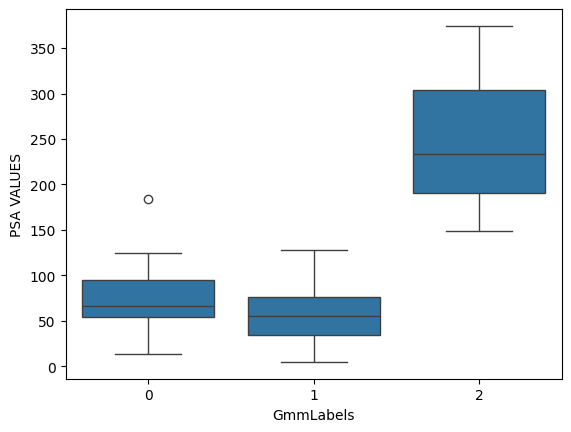

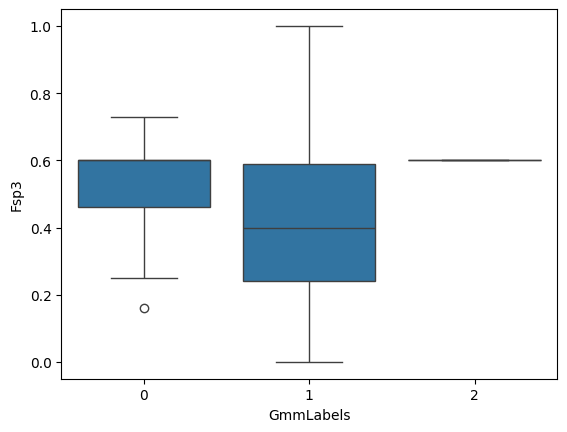

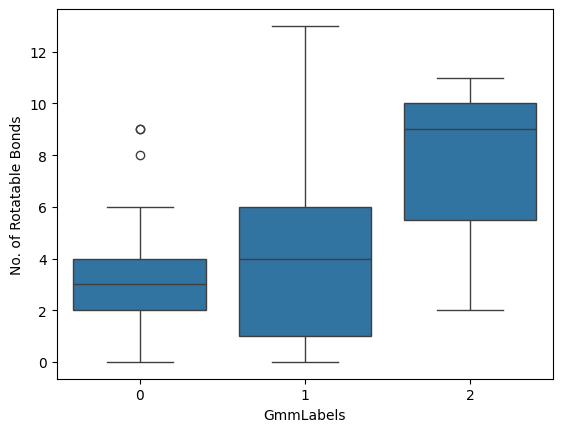

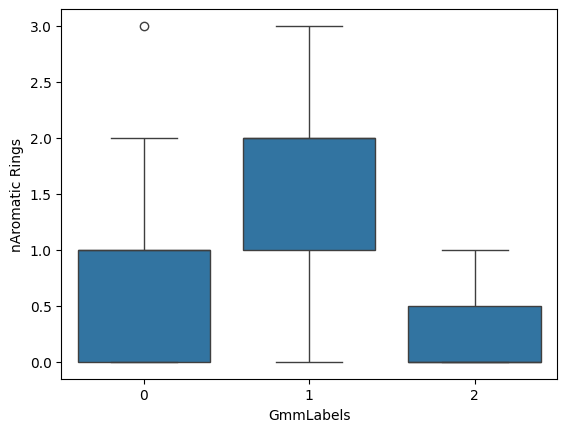

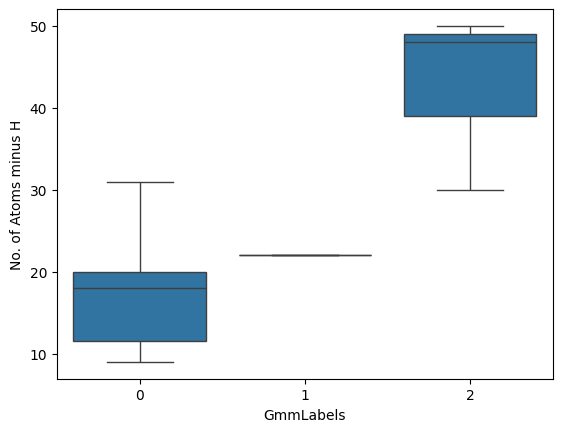

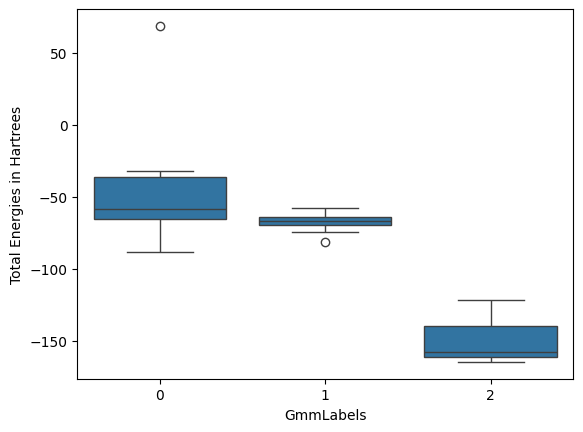

In [43]:
cols_visualise = ['PSA VALUES', 'Fsp3','No. of Rotatable Bonds','nAromatic Rings', 'No. of Atoms minus H','Total Energies in Hartrees']
for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    plt.show()